<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/smoothing_and_aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smoothing and Aggregation

Ref:
https://mlcourse.ai/articles/topic9-part1-time-series/
https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

In [ ]:
#during the lecture development, I found issue in Colab, so I write a small code
#to upgrade the package to fix the problem

!pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 6.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

#Smoothing

Data smoothing refers to a statistical approach of eliminating outliers from datasets to make the patterns more noticeable. It is achieved using algorithms to eliminate statistical noise from datasets. The use of data smoothing can help forecast patterns, such as those seen in share prices.

During the compilation of data, it may be altered to reduce or eliminate any wide variances or other statistical noises. Data smoothing helps traders or statisticians look at a lot of data – which can be complicated to process – to find trends or patterns they would’ve otherwise overlooked.

Such an approach uses simplified improvements to forecast various patterns better. It focuses on creating a basic direction for the main data points by avoiding any volatile pieces of data and drawing a smoother curve across data points.

Keys:

* Data smoothing can be defined as a statistical approach of eliminating outliers from datasets to make the patterns more noticeable.
* The random method, simple moving average, random walk, simple exponential, and exponential moving average are some of the methods used for data smoothing.
* Data smoothing can help in identifying trends in businesses, financial securities, and the economy.



##Data Smoothing Methods

The random method, simple moving average, random walk, simple exponential, and exponential moving average are some of the methods that can be used for data smoothing. The commonly used methods are discussed below:



###1. Simple Exponential

The simple exponential method is a popular data smoothing method because of the ease of calculation, flexibility, and good performance. It uses an average calculation for assigning the exponentially declining weights beginning with the most recent observation. The method can be easily learned and applied.

The predictions are considered accurate since the difference between the real projections and what really happens is accounted for in the simple exponential approach. However, the method is not capable of managing trends well. Hence, it is used when cyclical variations are not present.

**When to use**: Few data points, Irregular data, No seasonality or trend.

**Math behind**: Just keep in mind that SES only has one component called level (with a smoothing parameter denoted as “alpha” below). It is a weighted average of the previous level and the current observation:

In [ ]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


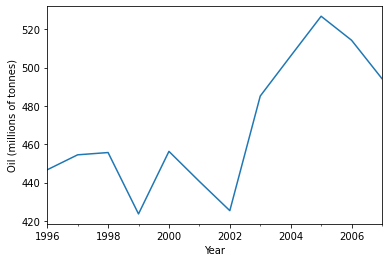

In [ ]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

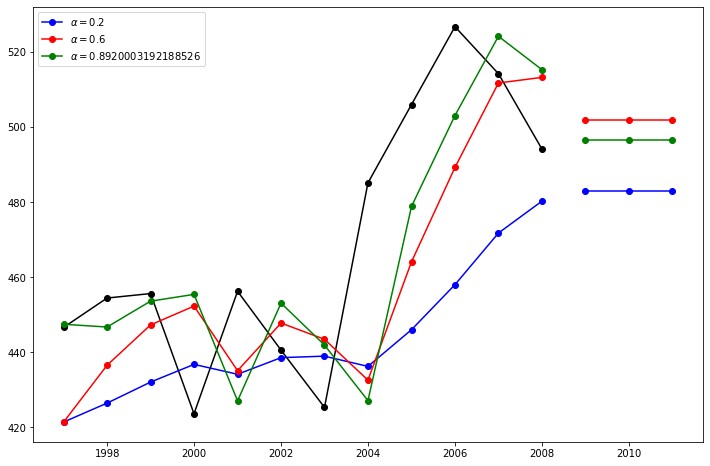

In [ ]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [ ]:
oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

In [ ]:
fit1.fittedvalues

1996-12-31    421.424200
1997-12-31    426.470660
1998-12-31    432.071188
1999-12-31    436.789550
2000-12-31    434.158080
2001-12-31    438.580724
2002-12-31    438.982199
2003-12-31    436.252260
2004-12-31    446.031688
2005-12-31    458.034990
2006-12-31    471.786392
2007-12-31    480.282894
Freq: A-DEC, dtype: float64

**Holt’s Method**

Lets take a look at another example. This time we use air pollution data and the Holt’s Method. We will fit three examples again. 1. In fit1 we again choose not to use the optimizer and provide explicit values for 𝛼=0.8 and 𝛽=0.2 2. In fit2 we do the same as in fit1 but choose to use an exponential model rather than a Holt’s additive model. 3. In fit3 we used a damped versions of the Holt’s additive model but allow the dampening parameter 𝜙 to be optimized while fixing the values for 𝛼=0.8 and 𝛽=0.2

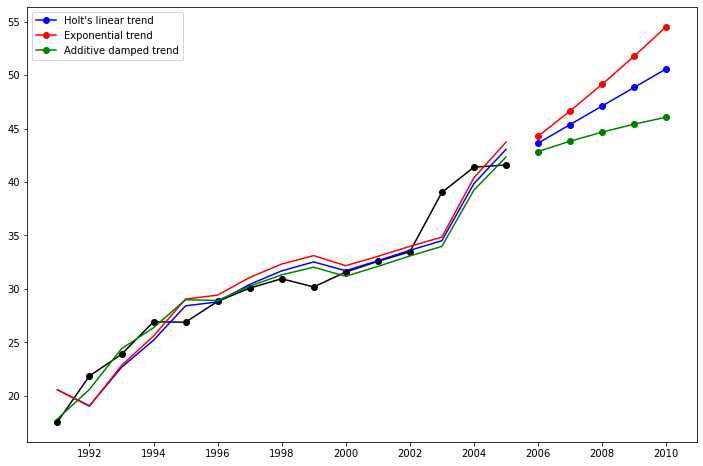

In [ ]:
fit1 = Holt(air, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

### 2. Moving Average

The moving average approach is best used when there is slight or no seasonal variation. Moving average data smoothing is used for separating random variation.

It is a simple data smoothing approach that economists use to help assess the underlying patterns in building permits, as well as other volatile datasets. Moving average consolidates the month-long data points into time units longer than a month, such as an average of data of several months.

**Simple Moving Average (SMA)**: Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.

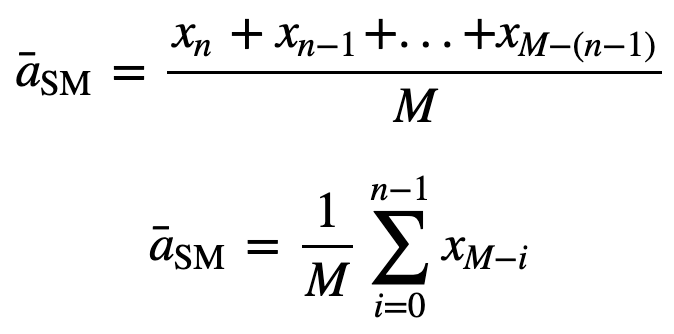

In [ ]:
import pandas as pd
import numpy as np

product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}

df = pd.DataFrame(product)

df.head()

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310


In [ ]:
#manaul

for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [ ]:
#pandas

df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [ ]:
df

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333
5,6,303,304.3,304.333333
6,7,329,314.0,314.000000
7,8,340,324.0,324.000000
8,9,316,328.3,328.333333
9,10,330,328.7,328.666667


In [ ]:
#window size to 4
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()

df

,month,demand,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1,290,NaN,NaN,NaN,NaN
1,2,260,NaN,NaN,NaN,NaN
2,3,288,279.3,279.333333,NaN,NaN
3,4,300,282.7,282.666667,284.5,284.50
4,5,310,299.3,299.333333,289.5,289.50
5,6,303,304.3,304.333333,300.2,300.25
6,7,329,314.0,314.000000,310.5,310.50
7,8,340,324.0,324.000000,320.5,320.50
8,9,316,328.3,328.333333,322.0,322.00
9,10,330,328.7,328.666667,328.8,328.75


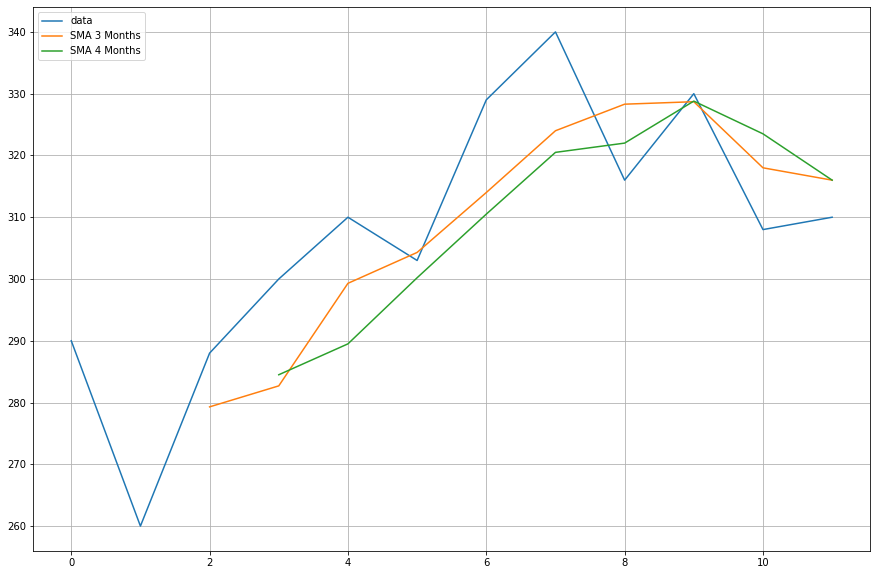

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

**Cumulative Moving Average (CMA)**: Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of n values.

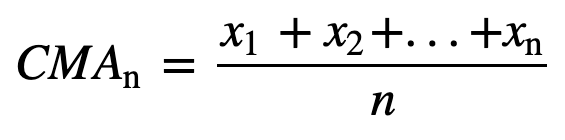

In [ ]:
#sample data from >> https://archive.ics.uci.edu/ml/datasets/air+quality

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ExampleData/AirQualityUCI.csv', sep = ";", decimal = ",")

df = df.iloc[ : , 0:14]

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

df.isna().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [ ]:
df_T = pd.DataFrame(df.iloc[:,-2])

df_T['CMA_4'] = df_T.expanding(min_periods=4).mean()

df_T

,T,CMA_4
0,13.6,NaN
1,13.3,NaN
2,11.9,NaN
3,11.0,12.450000
4,11.2,12.200000
...,...,...
9352,21.9,9.770940
9353,24.3,9.772493
9354,26.9,9.774324
9355,28.3,9.776304


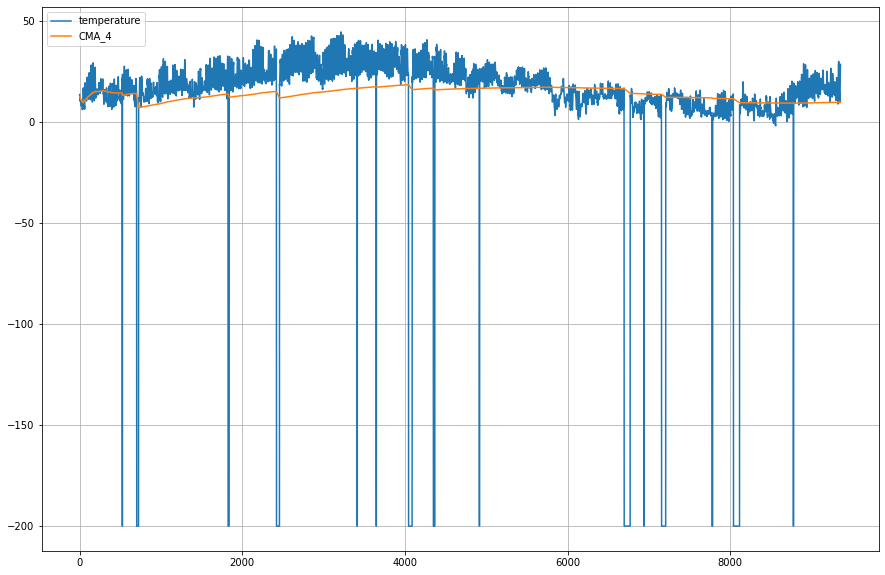

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.legend(loc=2)

**Exponential Moving Average (EMA)**: Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.
Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

In the exponential moving average approach, weights are applied to historical observations after using the exponential smoothing method. It focuses more on the latest data observations. Hence, the exponential moving average responds faster to price changes than the simple moving average method.

Furthermore, the predictions only need the previous volatility prediction and the previous cycle price shift. The forecast is not needed to be recalculated using a long price returns history.

In [ ]:
df_T['EMA'] = df_T.iloc[:,0].ewm(span=40,adjust=False).mean()

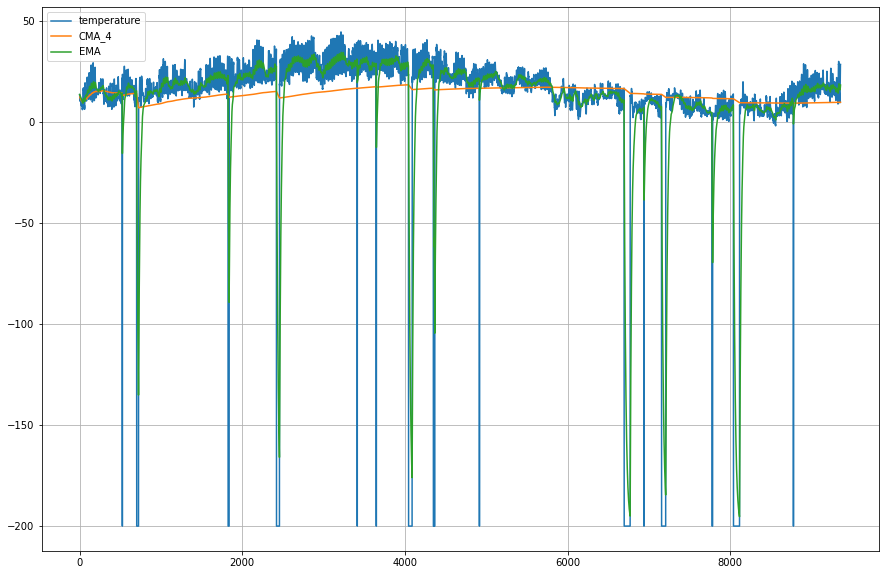

In [ ]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_T['T'],label='temperature')
plt.plot(df_T['CMA_4'],label='CMA_4')
plt.plot(df_T['EMA'],label='EMA')
plt.legend(loc=2)

Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.

(Practical example of moving average can be found here >> https://mlcourse.ai/articles/topic9-part1-time-series/)

###3. Random Walk

The random walk data smoothing method is commonly used for describing the patterns in financial instruments. Some investors think that the past movement in the price of a security and the future movements cannot be related. They use the random walk method, which assumes that a random variable will give the potential data points when added to the last accessible data point. (Good for non-stationary)

####What is random walk?

A random walk is the process by which randomly-moving objects wander away from where they started.

The simplest random walk to understand is a 1-dimensional walk. Suppose that the black dot below is sitting on a number line. The black dot starts in the center.

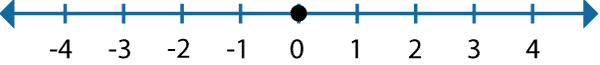

Then, it takes a step, either forward or backward, with equal probability. It keeps taking steps either forward or backward each time. Let's call the 1st step a1, the second step a2, the third step a3 and so on. Each "a" is either equal to +1 (if the step is forward) or -1 (if the step is backward). The picture below shows a black dot that has taken 5 steps and ended up at -1 on the number line.

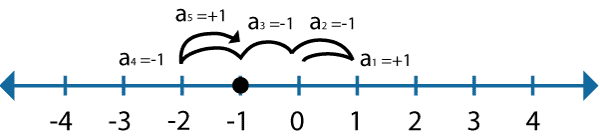 

Suppose we put the black dot at 0 and then let it take N steps (where N is any number). Now we want to know how far the black dot travels after it has taken N steps. Of course the distance traveled after N steps will vary each time we repeat the experiment, so what we want to know is, if we repeat the experiment many many times, how far the black dot will have traveled on average. Let's call the distance that the black dot has traveled "d". Keep in mind that d can either be positive or negative, depending on whether the black dot ends up to the right or left of 0. We know that for any one time that we repeat the experiment,

d = a1 + a2 + a3 + ... + aN

Now we use the notation <d> to mean "the average of d if we repeated the experiments many times":

<(d)> = <(a1 + a2 + a3 + ... + aN)> = <(a1)> + <(a2)> + <(a3)> + ... + <(aN)>

But <a1>=0, because if we repeated the experiment many many times, and a1 has an equal probability of being -1 or +1, we expect the average of a1 to be 0. So then,

<(d)> = <(a1)> + <(a2)> + <(a3)> + ... + <(aN)> = 0 + 0 + 0 + ... + 0 = 0

This isn't too surprising if you think about it. After all, <d> is the average location of the black dot after N steps, and since the dot is equally likely to move forward or backwards, we expect d to be 0, on average.

#### Extend the concept to 2d

That exercise didn't tell us anything about how far the black dot gets after N steps! We are going to have to be a little more clever if we want to find out any kind of useful information.

Here's an idea... Even though d can be positive or negative, d2 is always positive, so it can't average out to 0. What if we found the average value of d2?

<(d^2)> = <(a1 + a2 + a3 + ... + aN)^2> = <(a1 + a2 + a3 + ... + aN)(a1 + a2 + a3 + ... + aN)>

= (<(a1^2)> + <(a2^2)> + <(a3^2)> + ... + <(aN^2)>) + 2 (<(a1a2)> + <(a1a3)> + ... <(a1aN)> + <(a2a3)> + ... <(a2aN)> + ...)

First let's think about what <(a1^2)> is equal to. Well a1 can either be +1 or -1. Either way, a1^2 =1. Then on average a1^2 is 1 and <(a1^2)> = 1. The same applies to <(a2^2)>, <(a3^2)>, and all the way up to <(aN^2)>.

Now let's think about what <(a1a2)> is equal to. There are 4 possible combinations of a1 and a2, each with equal probability:

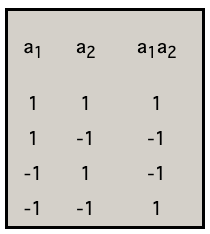

Since a1a2 is equally likely to be +1 or -1, <(a1a2)> = 0. The same is true of all of <(a1a3)>, <(a1aN)>, <(a2a3)>, <(a2aN)> and all of the other terms containing two different steps. Then:

<(d^2)> = (<(a1^2)> + <(a2^2)> + <(a3^2)> + ... + <(aN^2)>) + 2 (<(a1a2)> + <(a1a3)> + ... <(a1aN)> + <(a2a3)> + ... <(a2aN)> + ...)

= (1 + 1 + 1 + ... +1) + 2 (0 + 0 + ... + 0 + 0 + ...) = N

Now we're getting somewhere! The average of the square of the distance is equal to N. If we take the square root of this equation, we realize that:

sqrt(<(d2)>)=sqrt(N)

Since sqrt(<(d2)>) is something like the average positive distance away from 0 after N steps (technically, it's called the "root-mean-squared" distance), we expect that after N steps, the black dot will be roughly sqrt(N) steps away from where it started. So for 25 steps, we expect the black dot to have moved roughly 5 total spaces from 0 in either direction. Of course sometimes it will move more and sometimes fewer total spaces, but 5 is roughly what we might expect.

More succinctly, we can describe this process as:

```
y(t) = B0 + B1*X(t-1) + e(t)
```

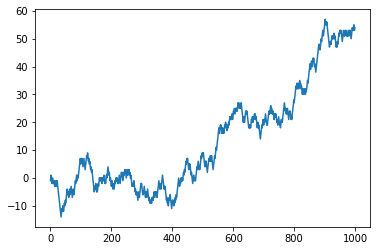

In [ ]:
# Example of Random walk in python
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

####Smoothing with random walk

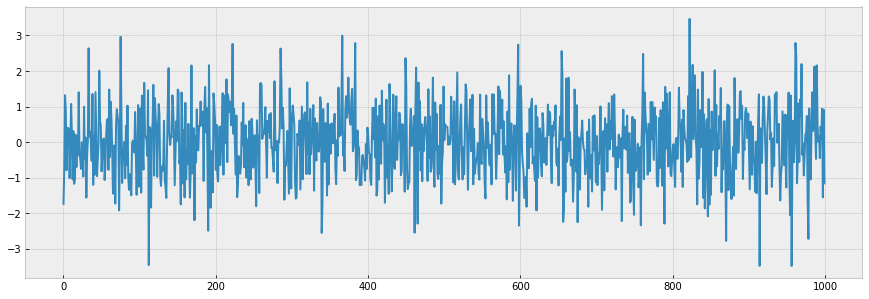

In [ ]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

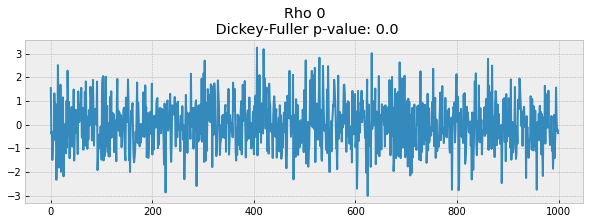

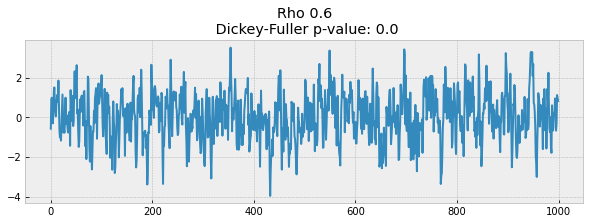

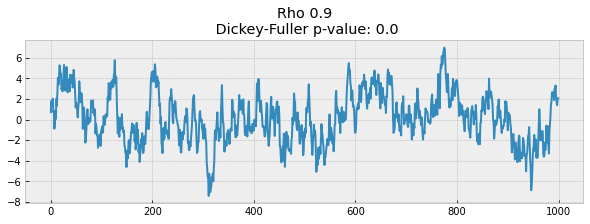

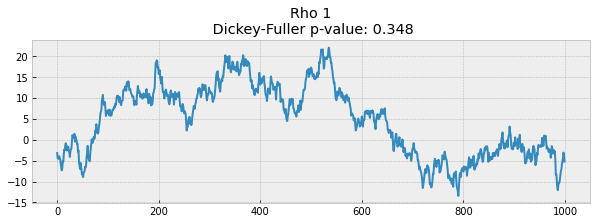

In [ ]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

##Benefits of Data Smoothing

Data smoothing methods are easy to understand and implement. It can help in identifying trends in businesses, financial securities, and the economy.

Data smoothing can help expose patterns in complicated data. It assists in the prediction of the usual direction of the next observed data point. In case users do not need certain data points, data smoothing eliminates the data points if they are of no interest to the user.

It also helps to generate smooth graphs that depict trends and patterns.

##Limitations of Data Smoothing

Data smoothing does not necessarily offer an interpretation of the themes or patterns it helps to recognize. It can also contribute to certain data points being overlooked by focusing on others.

Sometimes, data smoothing may eliminate the usable data points. It may lead to incorrect forecasts if the data set is seasonal and not completely be reflective of the reality produced by the data points. Moreover, data smoothing can be prone to considerable disruption from the outliers in the data.

#Aggregation

We have discussed a lot of aggregation techniques in previous lectures, especially in the part of SQL. However in this section, we would like to address "window funtion" aggregation.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 4),
      index = pd.date_range('1/1/2000', periods=10),
      columns = ['A', 'B', 'C', 'D'])

df

,A,B,C,D
2000-01-01,0.789867,0.305396,0.896011,0.426501
2000-01-02,0.653906,0.368786,-0.181286,-0.727252
2000-01-03,-1.115573,-2.023392,0.980775,0.393603
2000-01-04,-0.506031,1.485109,0.106838,1.007953
2000-01-05,-2.049101,2.126044,0.834682,0.688590
2000-01-06,-0.326243,0.244741,0.510404,-1.402890
2000-01-07,0.704850,0.182680,1.890084,0.318293
2000-01-08,1.020011,0.704940,-0.059635,-0.526063
2000-01-09,0.243470,-0.638875,1.025843,0.576877
2000-01-10,-0.843803,0.019659,-0.264354,0.419293


In [ ]:
r = df.rolling(window=3,min_periods=1)
r.aggregate(np.sum)

,A,B,C,D
2000-01-01,0.789867,0.305396,0.896011,0.426501
2000-01-02,1.443773,0.674183,0.714725,-0.300751
2000-01-03,0.328200,-1.349209,1.695500,0.092852
2000-01-04,-0.967698,-0.169496,0.906327,0.674304
2000-01-05,-3.670706,1.587761,1.922295,2.090146
2000-01-06,-2.881375,3.855894,1.451925,0.293653
2000-01-07,-1.670495,2.553465,3.235171,-0.396007
2000-01-08,1.398618,1.132362,2.340853,-1.610660
2000-01-09,1.968330,0.248745,2.856292,0.369107
2000-01-10,0.419678,0.085724,0.701854,0.470107


Single column case

In [ ]:
r['A'].aggregate(np.sum)

2000-01-01    0.789867
2000-01-02    1.443773
2000-01-03    0.328200
2000-01-04   -0.967698
2000-01-05   -3.670706
2000-01-06   -2.881375
2000-01-07   -1.670495
2000-01-08    1.398618
2000-01-09    1.968330
2000-01-10    0.419678
Freq: D, Name: A, dtype: float64

Multiple columns case

In [ ]:
r[['A','B']].aggregate(np.sum)


,A,B
2000-01-01,0.789867,0.305396
2000-01-02,1.443773,0.674183
2000-01-03,0.328200,-1.349209
2000-01-04,-0.967698,-0.169496
2000-01-05,-3.670706,1.587761
2000-01-06,-2.881375,3.855894
2000-01-07,-1.670495,2.553465
2000-01-08,1.398618,1.132362
2000-01-09,1.968330,0.248745
2000-01-10,0.419678,0.085724
